<a href="https://colab.research.google.com/github/Misetsu/Colab/blob/main/K_means%26PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# インストール

In [ ]:
!pip install japanize-matplotlib

# インポート

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# diamondsデータセット

In [ ]:
df_diamond = sns.load_dataset("diamonds")
df_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


*   carat -> Weight of the diamond (0.2–5.01 gram)
*   cut -> Diamond cut quality (Fair (Worst), Good, Very Good, Premium,
Ideal (Best))
*   color -> Diamond colour (J (Worst) , D (Best))
*   clarity -> A measurement of how clear the diamond is (I1 (Worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (Best))
*   depth -> Total depth percentage (z / mean(x, y) = 2 * z / (x + y) (43–79))
*   table -> Width of top of diamond relative to widest point (43–95)
*   price -> Price in US dollars (326 — 18,823)
*   x -> Length in mm (0–10.74)
*   y -> Width in mm (0–58.90)
*   z -> Depth in mm (0–31.80)


# 前処理

cut, color, clarityをマッピングする。0が一番品質よくて、数字が増えるほど品質が悪い。

In [ ]:
map = {"Ideal":0, "Premium":1, "Very Good":2, "Good":3, "Fair":4}
df_diamond["cut"] = df_diamond["cut"].map(map)
df_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
map = {"D":0, "E":1, "F":2, "G":3, "H":4, "I":5, "J":6}
df_diamond["color"] = df_diamond["color"].map(map)
df_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,0,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,4,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
map = {"IF":0, "VVS1":1, "VVS2":2, "VS1":3, "VS2":4, "SI1":5, "SI2":6, "I1":7}
df_diamond["clarity"] = df_diamond["clarity"].map(map)
df_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,5,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,0,5,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,5,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,4,6,61.0,58.0,2757,6.15,6.12,3.74


x, y, zはどれもダイヤモンドの辺の長さあを表しているので、新しくsizeの列にまとめる。

In [ ]:
df_diamond["size"] = df_diamond.x * df_diamond.y * df_diamond.z
df_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,0,1,6,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,1,1,5,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,1,5,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,3,6,6,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,5,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,3,0,5,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,2,0,5,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,1,4,6,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [ ]:
df_diamond = df_diamond.drop(["x", "y", "z"], axis=1)
df_diamond

,carat,cut,color,clarity,depth,table,price,size
0,0.23,0,1,6,61.5,55.0,326,38.202030
1,0.21,1,1,5,59.8,61.0,326,34.505856
2,0.23,3,1,3,56.9,65.0,327,38.076885
3,0.29,1,5,4,62.4,58.0,334,46.724580
4,0.31,3,6,6,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,0,0,5,60.8,57.0,2757,115.920000
53936,0.72,3,0,5,63.1,55.0,2757,118.110175
53937,0.70,2,0,5,62.8,60.0,2757,114.449728
53938,0.86,1,4,6,61.0,58.0,2757,140.766120


In [ ]:
sc = StandardScaler()

result = sc.fit_transform(df_diamond)
df_diamond_st = pd.DataFrame(result, columns=df_diamond.columns)
df_diamond_st

,carat,cut,color,clarity,depth,table,price,size
0,-1.198168,-0.981473,-0.937163,1.245215,-0.174092,-1.099672,-0.904095,-1.171294
1,-1.240361,-0.085889,-0.937163,0.638095,-1.360738,1.585529,-0.904095,-1.218533
2,-1.198168,1.705279,-0.937163,-0.576145,-3.385019,3.375663,-0.903844,-1.172894
3,-1.071587,-0.085889,1.414272,0.030975,0.454133,0.242928,-0.902090,-1.062372
4,-1.029394,1.705279,2.002131,1.245215,1.082358,0.242928,-0.901839,-0.996008
...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.981473,-1.525021,0.638095,-0.662711,-0.204605,-0.294731,-0.178024
53936,-0.164427,1.705279,-1.525021,0.638095,0.942753,-1.099672,-0.294731,-0.150033
53937,-0.206621,0.809695,-1.525021,0.638095,0.733344,1.137995,-0.294731,-0.196815
53938,0.130927,-0.085889,0.826413,1.245215,-0.523105,0.242928,-0.294731,0.139520


# クラスタリング

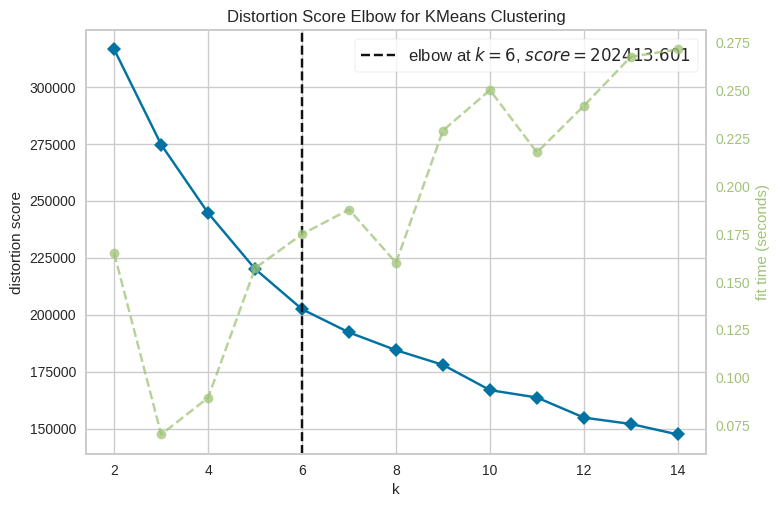

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(n_init="auto")
visualizer = KElbowVisualizer(model, k=(2, 15))
visualizer.fit(df_diamond_st)
visualizer.show()

In [ ]:
model = KMeans(n_clusters=6, n_init="auto")

model.fit(df_diamond_st)

KMeans(n_clusters=6, n_init='auto')

In [ ]:
df_diamond_cl = df_diamond_st.copy()
df_diamond_cl["cluster"] = model.labels_
df_diamond_cl

,carat,cut,color,clarity,depth,table,price,size,cluster
0,-1.198168,-0.981473,-0.937163,1.245215,-0.174092,-1.099672,-0.904095,-1.171294,1
1,-1.240361,-0.085889,-0.937163,0.638095,-1.360738,1.585529,-0.904095,-1.218533,0
2,-1.198168,1.705279,-0.937163,-0.576145,-3.385019,3.375663,-0.903844,-1.172894,0
3,-1.071587,-0.085889,1.414272,0.030975,0.454133,0.242928,-0.902090,-1.062372,3
4,-1.029394,1.705279,2.002131,1.245215,1.082358,0.242928,-0.901839,-0.996008,5
...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.981473,-1.525021,0.638095,-0.662711,-0.204605,-0.294731,-0.178024,1
53936,-0.164427,1.705279,-1.525021,0.638095,0.942753,-1.099672,-0.294731,-0.150033,5
53937,-0.206621,0.809695,-1.525021,0.638095,0.733344,1.137995,-0.294731,-0.196815,5
53938,0.130927,-0.085889,0.826413,1.245215,-0.523105,0.242928,-0.294731,0.139520,2


In [ ]:
df_diamond["cluster"] = model.labels_
df_diamond

,carat,cut,color,clarity,depth,table,price,size,cluster
0,0.23,0,1,6,61.5,55.0,326,38.202030,1
1,0.21,1,1,5,59.8,61.0,326,34.505856,0
2,0.23,3,1,3,56.9,65.0,327,38.076885,0
3,0.29,1,5,4,62.4,58.0,334,46.724580,3
4,0.31,3,6,6,63.3,58.0,335,51.917250,5
...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,5,60.8,57.0,2757,115.920000,1
53936,0.72,3,0,5,63.1,55.0,2757,118.110175,5
53937,0.70,2,0,5,62.8,60.0,2757,114.449728,5
53938,0.86,1,4,6,61.0,58.0,2757,140.766120,2


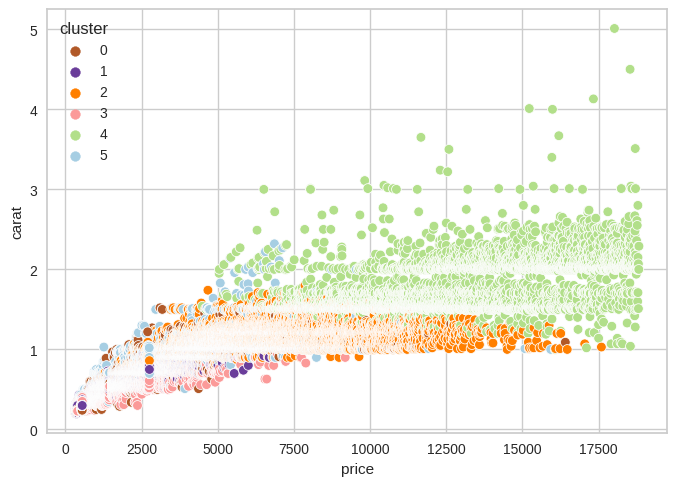

In [ ]:
sns.scatterplot(data=df_diamond, x="price", y="carat", hue="cluster", palette="Paired_r")
plt.show()

<Axes: xlabel='cluster'>

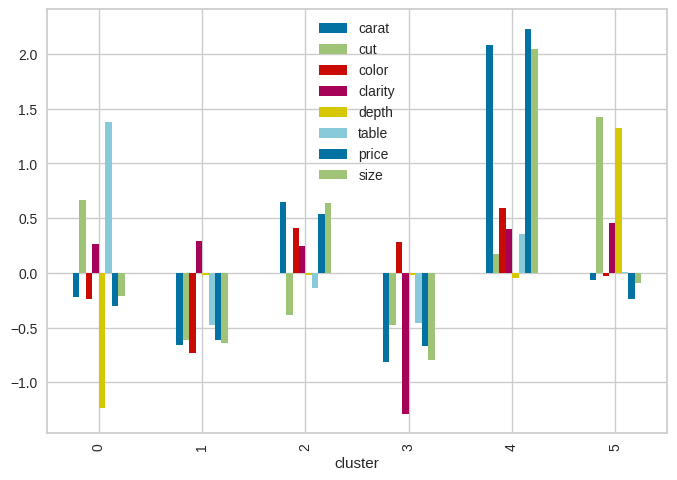

In [ ]:
df_diamond_cl.groupby("cluster").mean().plot(kind="bar")

*   cluster 0

    ちょっと小さいで価格が平均よりちょっと低いダイヤモンド。特に長い辺があり形があまりきれいではない。
*   cluster 1

    価格が比較的に低いグループ。透明度は平均より上ですが、色があまりきれいではない。
    
*   cluster 2

    やや大きいでやや高いグループ。色も透明度も平均より上。cluster 3に比べるとカットの品質が悪い。

*   cluster 3
  
    価格が比較的に低いグループ。色は平均より上ですが、透明度が一番悪いグループ。cluster 4と比べてみれば、色より透明度の方が価格を影響する。

*   cluster 4

    大きいかつ価格が高いダイヤモンド。特に長い辺がなく、色や透明度も平均より上。

    形がきれい + 色の品質がいい + 大きい = 高い

*   cluster 5

    ちょっと小さいで価格が平均よりちょっと低いダイヤモンド。cluster 0と比べてると同じく形がきれいではないが、透明度がより良い方で価格も少し高い。

重さとサイズが直接価格に影響する。その次が色や透明度、例え形がきれいではなくても、価格はそこまで低くはない。そして色や透明度どれが一つが平均より大分下回った場合は、価格が一気に下がります。

# PCA

In [ ]:
pca = PCA(n_components=2,whiten=True)
pca_scores = pca.fit_transform(df_diamond_st)
df_pca = pd.DataFrame(pca_scores, columns=["PCA1", "PCA2"])
df_pca

,PCA1,PCA2
0,-1.105677,-0.311342
1,-0.903099,1.620968
2,-0.745581,3.459720
3,-0.746995,0.172790
4,-0.352370,1.216825
...,...,...
53935,-0.365079,-0.101960
53936,-0.228322,0.647313
53937,-0.116941,1.437580
53938,0.264326,0.312367


In [ ]:
df_diamond_pca = pd.concat([df_diamond_cl, df_pca], axis=1)
df_diamond_pca

,carat,cut,color,clarity,depth,table,price,size,cluster,PCA1,PCA2
0,-1.198168,-0.981473,-0.937163,1.245215,-0.174092,-1.099672,-0.904095,-1.171294,1,-1.105677,-0.311342
1,-1.240361,-0.085889,-0.937163,0.638095,-1.360738,1.585529,-0.904095,-1.218533,0,-0.903099,1.620968
2,-1.198168,1.705279,-0.937163,-0.576145,-3.385019,3.375663,-0.903844,-1.172894,0,-0.745581,3.459720
3,-1.071587,-0.085889,1.414272,0.030975,0.454133,0.242928,-0.902090,-1.062372,3,-0.746995,0.172790
4,-1.029394,1.705279,2.002131,1.245215,1.082358,0.242928,-0.901839,-0.996008,5,-0.352370,1.216825
...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.981473,-1.525021,0.638095,-0.662711,-0.204605,-0.294731,-0.178024,1,-0.365079,-0.101960
53936,-0.164427,1.705279,-1.525021,0.638095,0.942753,-1.099672,-0.294731,-0.150033,5,-0.228322,0.647313
53937,-0.206621,0.809695,-1.525021,0.638095,0.733344,1.137995,-0.294731,-0.196815,5,-0.116941,1.437580
53938,0.130927,-0.085889,0.826413,1.245215,-0.523105,0.242928,-0.294731,0.139520,2,0.264326,0.312367


In [ ]:
df_diamond_pca.corr().loc[:"size", "PCA1":]

,PCA1,PCA2
carat,0.981306,-0.127747
cut,0.237732,0.745711
color,0.334931,-0.220821
clarity,0.415651,0.320320
depth,0.016788,-0.141862
table,0.292428,0.784147
price,0.905447,-0.222053
size,0.970720,-0.141101


*   PCA1

  carat, price, sizeに強い正の相関を表しています。どれもダイヤモンドの大きさに関しているので、PCA1はダイヤモンドの大きさを表していると予想している。
*   PCA2

  cut, tableに正の相関を表しています。2つの列も切断面に関するデータですので、PCA２は切断面の品質を表していると予想している。



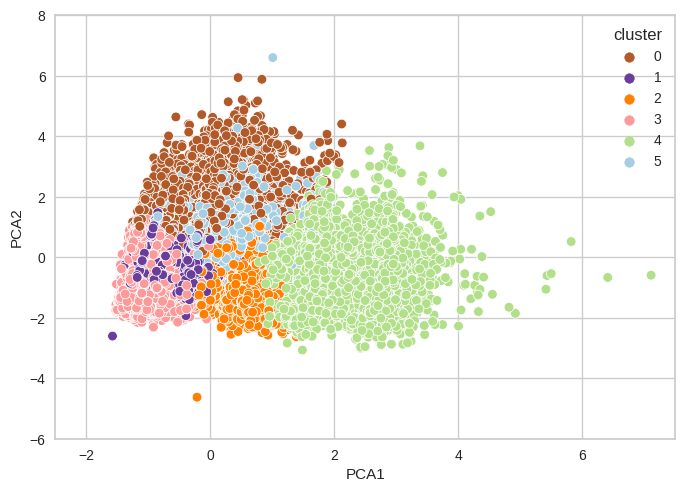

In [ ]:
# PCAなしのクラスタリング

fig, ax = plt.subplots()
sns.scatterplot(data=df_diamond_pca, x="PCA1", y="PCA2", hue="cluster", palette="Paired_r")
ax.set_xlim(-2.5, 7.5)
ax.set_ylim(-6, 8)
plt.show()

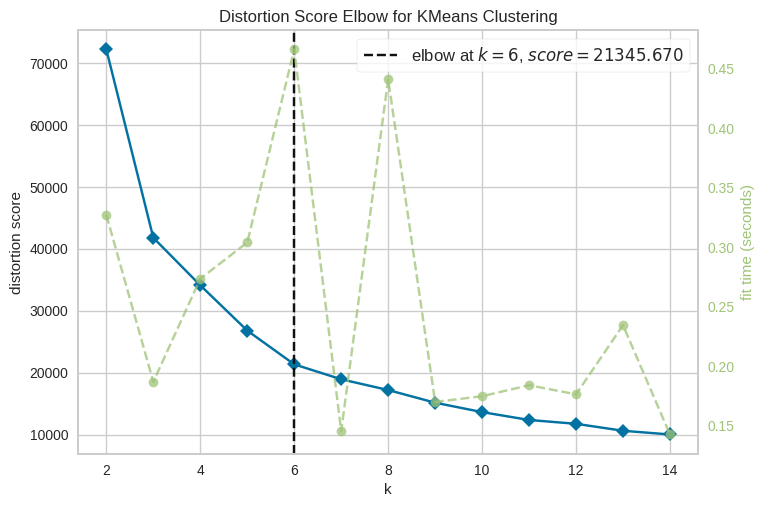

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(n_init="auto")
visualizer = KElbowVisualizer(model, k=(2, 15))
visualizer.fit(df_pca)
visualizer.show()

In [ ]:
model = KMeans(n_clusters=6, n_init="auto")

model.fit(df_pca)

KMeans(n_clusters=6, n_init='auto')

<Axes: xlabel='cluster'>

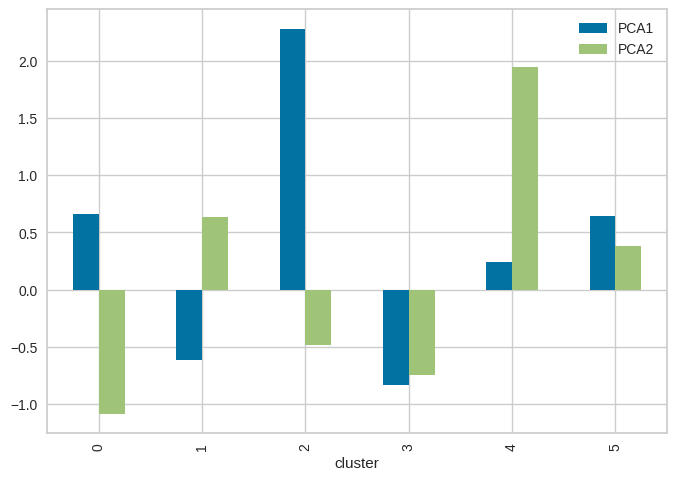

In [ ]:
df_pca["cluster"] = model.labels_
df_pca.groupby("cluster").mean().plot(kind="bar")

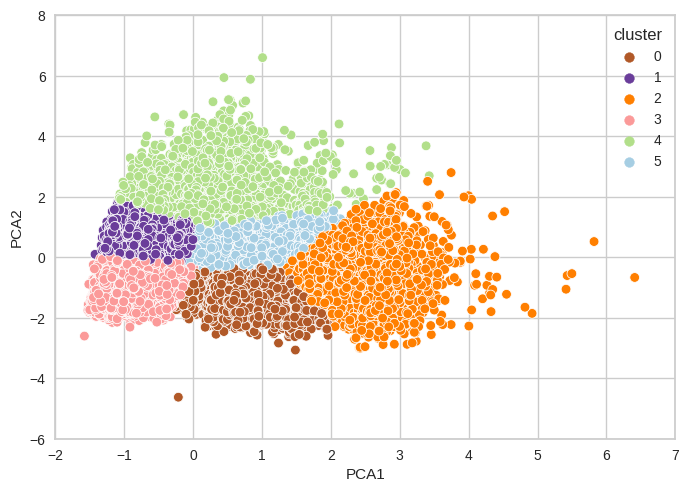

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="cluster", palette="Paired_r")
ax.set_xlim(-2, 7)
ax.set_ylim(-6, 8)
plt.show()